## Library

In [1]:
import math
import random
import numpy as np
import squigglepy as sq
import matplotlib.pyplot as plt

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint

exec(open('library.py').read())
print('Loaded')

Loaded


In [14]:
def plot_anchor(anchor, bins=200, alpha=1, label=None):
    plt.hist(anchor, bins=bins, alpha=alpha, label=label)
    if label:
        print(label)
    pprint(sq.get_percentiles(anchor))
    return None


def sample_tai_log_flop_needs(brain, efficiency, transformative_vs_human, horizon_length, scaling_exponent,
                              flops_per_param_per_sec, params=None, ref_params=11.2, ref_params_samples=12,
                              bayes_update=None, n=1, debug=False):
    if bayes_update is None:
        bayes_update = lambda x: x
    
    n = int(n)
    if n > 1:
        return np.array([sample_tai_log_flop_needs(brain=brain,
                                                   efficiency=efficiency,
                                                   transformative_vs_human=transformative_vs_human,
                                                   horizon_length=horizon_length,
                                                   scaling_exponent=scaling_exponent,
                                                   flops_per_param_per_sec=flops_per_param_per_sec,
                                                   params=params,
                                                   ref_params=ref_params,
                                                   ref_params_samples=ref_params_samples,
                                                   bayes_update=bayes_update,
                                                   debug=debug) for _ in range(n)])
    elif n <= 0:
        return ValueError('n must be >= 1')

    
    brain_ = sq.sample(brain)
    eff_ = sq.sample(efficiency)
    tvh_ = sq.sample(transformative_vs_human)
    h_ = sq.sample(horizon_length)
    e_ = sq.sample(scaling_exponent)
    fpp_ = sq.sample(flops_per_param_per_sec)
    
    if params is None:
        params_ = brain_ + eff_ - fpp_        
        if debug:
            print(f"{brain_} + {eff_} + {tvh_} + {h_} + {ref_params_samples} - {e_} * {ref_params} + {e_} * ({brain_} + {eff_} - {fpp_})")
    else:
        params_ = sq.sample(params)
        if debug:
            print(f"{brain_} + {eff_} + {tvh_} + {h_} + {ref_params_samples} - {e_} * {ref_params} + {e_} * {params_}")
        
    return bayes_update(brain_ + eff_ + tvh_ + h_ + ref_params_samples - e_ * ref_params + e_ * params_)


def cotra_bayes_update_against_low_flop(f):
    f = f + sq.sample(sq.norm(1,3)) if f < 27 and random.random() > 0.3 else f
    f = f + sq.sample(sq.norm(1,3)) if f < 26 and random.random() > 0.2 else f
    f = f + sq.sample(sq.norm(1,3)) if f < 25 and random.random() > 0.1 else f
    f = f + sq.sample(sq.norm(1,3)) if f < 24 else f
    f = 24 if f < 24 else f
    return f


def sample_cotra_anchor(horizon_length, bayes_update=cotra_bayes_update_against_low_flop, n=1):
    return sample_tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                     efficiency=sq.const(1),
                                     transformative_vs_human=sq.norm(-2,2),
                                     horizon_length=horizon_length,
                                     scaling_exponent=sq.norm(0.5,1.1),
                                     flops_per_param_per_sec=sq.norm(1,2),
                                     bayes_update=bayes_update,
                                     n=n)


print('Loaded')

Loaded


## Cotra's Short NN Anchor

{1: 25.327533741693134,
 5: 26.53613218431508,
 10: 27.272762977501017,
 20: 28.222649067331854,
 30: 29.202531015375147,
 40: 30.357797147577596,
 50: 31.544377224964133,
 60: 32.80255567832367,
 70: 34.138819597214635,
 80: 35.851555153115825,
 90: 38.396575361644025,
 95: 40.718272537992796,
 99: 45.25996733304891}


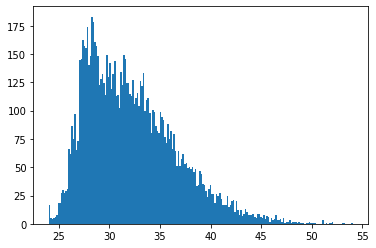

In [6]:
short_horizon_nn_anchor = sample_cotra_anchor(horizon_length=sq.norm(0,3), n=10000)
plot_anchor(short_horizon_nn_anchor)

Before update
{1: 21.889661723281407,
 5: 24.28519024946992,
 10: 25.821950376800057,
 20: 27.595800527442535,
 30: 28.969230412794577,
 40: 30.25272666734112,
 50: 31.478673431810236,
 60: 32.64533467111195,
 70: 34.01439675846988,
 80: 35.78584048076696,
 90: 38.38211045774014,
 95: 40.60321267115759,
 99: 45.40447823521719}
After update
{1: 25.327533741693134,
 5: 26.53613218431508,
 10: 27.272762977501017,
 20: 28.222649067331854,
 30: 29.202531015375147,
 40: 30.357797147577596,
 50: 31.544377224964133,
 60: 32.80255567832367,
 70: 34.138819597214635,
 80: 35.851555153115825,
 90: 38.396575361644025,
 95: 40.718272537992796,
 99: 45.25996733304891}


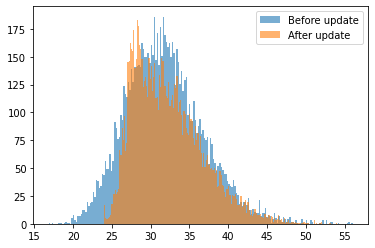

In [7]:
short_no_update = sample_cotra_anchor(horizon_length=sq.norm(0,3), bayes_update=None, n=10000)
plot_anchor(short_no_update, alpha=0.6, label='Before update')
plot_anchor(short_horizon_nn_anchor, alpha=0.6, label='After update')
plt.legend()

## Cotra's Medium NN Anchor

{1: 26.636281919915596,
 5: 27.913165188065125,
 10: 28.98175596590023,
 20: 30.722949258979288,
 30: 32.0807942717055,
 40: 33.239445761103894,
 50: 34.482134211571655,
 60: 35.75680080894887,
 70: 37.10230574390647,
 80: 38.85090756638188,
 90: 41.47255512106369,
 95: 43.68029342502102,
 99: 48.34242149404704}


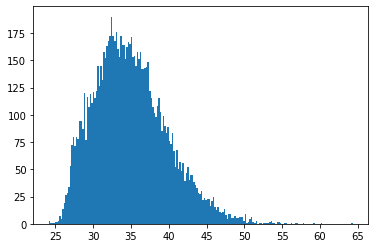

In [8]:
medium_horizon_nn_anchor = sample_cotra_anchor(horizon_length=sq.norm(3,6), n=10000)
plot_anchor(medium_horizon_nn_anchor)

## Cotra's Long NN Anchor

{1: 28.109485287977687,
 5: 30.570604867075875,
 10: 31.962120740638753,
 20: 33.77352877513297,
 30: 35.11271787785722,
 40: 36.32007319615979,
 50: 37.50136641908172,
 60: 38.73200243035777,
 70: 40.19242753347881,
 80: 41.87484154607855,
 90: 44.33729431903602,
 95: 46.685846627838515,
 99: 51.85251668187988}


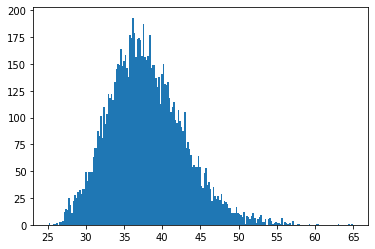

In [9]:
long_horizon_nn_anchor = sample_cotra_anchor(horizon_length=sq.norm(6,9), n=10000)
plot_anchor(long_horizon_nn_anchor)

## Cotra's GPT Anchor

{1: 25.01221200612905,
 5: 26.113677831151165,
 10: 26.72196249841953,
 20: 27.535208862515038,
 30: 28.203642568358635,
 40: 28.995975586874664,
 50: 29.97936350198097,
 60: 31.206326871929225,
 70: 32.620395243863534,
 80: 34.35546481987981,
 90: 36.99223667712824,
 95: 39.09640601519272,
 99: 43.53034102456469}


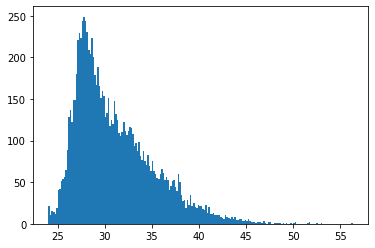

In [10]:
gpt_anchor = sample_cotra_anchor(horizon_length=sq.const(0), n=10000)
plot_anchor(gpt_anchor)

## Cotra's Lifetime Anchor

{1: 25.126748943378995,
 5: 26.09711039648445,
 10: 26.546969454465113,
 20: 27.238624592852133,
 30: 27.7579055195602,
 40: 28.292291315375696,
 50: 28.880355446689354,
 60: 29.657791195847523,
 70: 30.75047109776083,
 80: 31.937787650466735,
 90: 33.682547587537805,
 95: 35.15147035202088,
 99: 37.92079206726543}


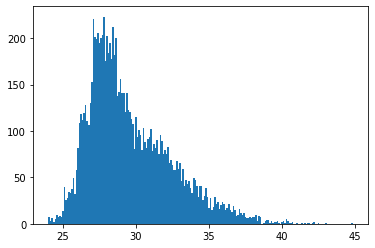

In [11]:
lifetime_anchor = sample_tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                            efficiency=sq.mixture([sq.lognorm(2,5),
                                                                   sq.lognorm(5,9)],
                                                                  [0.5,0.5]),
                                            transformative_vs_human=sq.norm(-2,2),
                                            horizon_length=sq.const(9),
                                            scaling_exponent=sq.const(0),
                                            flops_per_param_per_sec=sq.const(0),
                                            ref_params_samples=0,
                                            bayes_update=cotra_bayes_update_against_low_flop,
                                            n=10000)
plot_anchor(lifetime_anchor)

## Cotra's Evolution Anchor

{1: 32.18040913134275,
 5: 34.610197381292856,
 10: 36.040677175574864,
 20: 37.671802936316794,
 30: 38.81825765287221,
 40: 39.83721979827675,
 50: 40.77729616409945,
 60: 41.67860603094978,
 70: 42.74497382491939,
 80: 43.952106317348914,
 90: 45.64912629919775,
 95: 46.98179983143121,
 99: 49.552453706095356}


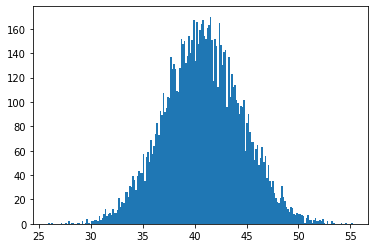

In [12]:
average_ancestor_brain_flops = sq.lognorm(3,6)
log_n_individuals = sq.norm(20,22)
evo_time_log_sec = sq.const(16)
evolution_anchor = [sample_tai_log_flop_needs(brain=average_ancestor_brain_flops,
                                              efficiency=sq.norm(-6,5), # TODO: This seems not quite right
                                              transformative_vs_human=sq.norm(-2,2),
                                              horizon_length=lambda: (sq.sample(log_n_individuals) +
                                                                      sq.sample(evo_time_log_sec)),
                                              scaling_exponent=sq.const(0),
                                              flops_per_param_per_sec=sq.const(0),
                                              ref_params_samples=0,
                                              bayes_update=None) for s in range(10000)]
plot_anchor(evolution_anchor)


## Cotra's Genome Anchor

{1: 27.85221775100662,
 5: 29.30997485806309,
 10: 30.20970034183868,
 20: 31.42102958007974,
 30: 32.31127139988735,
 40: 33.09551354013962,
 50: 33.83239400746748,
 60: 34.613232062007214,
 70: 35.43619706926934,
 80: 36.47704775103436,
 90: 37.91749166311086,
 95: 39.20068373185658,
 99: 41.81011640512475}


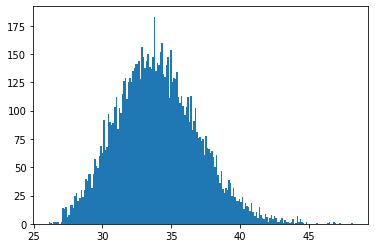

In [15]:
genome_anchor = sample_tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                          params=sq.norm(8.3,9.44), # Centered on 8.87... there are ~10^8.7 'params' in genome
                                          efficiency=sq.norm(0,2),
                                          transformative_vs_human=sq.norm(-2,2),
                                          horizon_length=sq.norm(7,9),
                                          scaling_exponent=sq.norm(0.5,1.1),
                                          flops_per_param_per_sec=sq.norm(1,2),
                                          bayes_update=cotra_bayes_update_against_low_flop,
                                          n=10000)
plot_anchor(genome_anchor)


## All Cotra Anchors

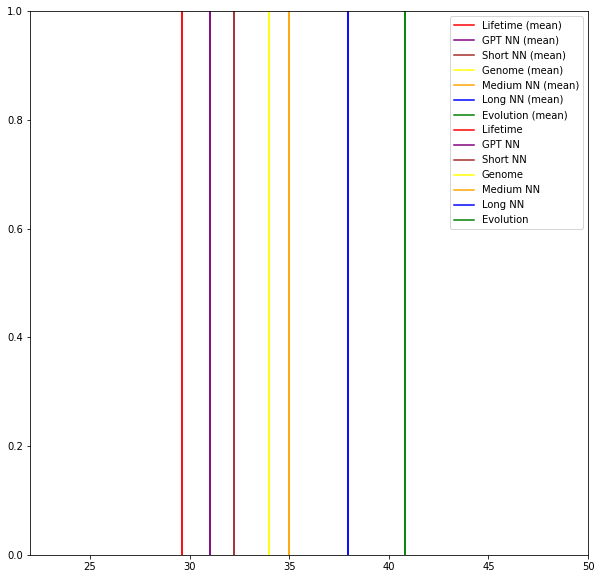

In [16]:
plt.figure(figsize=(10,10))
alpha = 0.6; bins = 100
plt.axvline(x = np.mean(lifetime_anchor), label='Lifetime (mean)', color='red')
plt.axvline(x = np.mean(gpt_anchor), label='GPT NN (mean)', color='purple')
plt.axvline(x = np.mean(short_horizon_nn_anchor), label='Short NN (mean)', color='brown')
plt.axvline(x = np.mean(genome_anchor), label='Genome (mean)', color='yellow')
plt.axvline(x = np.mean(medium_horizon_nn_anchor), label='Medium NN (mean)', color='orange')
plt.axvline(x = np.mean(long_horizon_nn_anchor), label='Long NN (mean)', color='blue')
plt.axvline(x = np.mean(evolution_anchor), label='Evolution (mean)', color='green')

plt.axvline(x = np.mean(lifetime_anchor), label='Lifetime', color='red')
plt.axvline(x = np.mean(gpt_anchor), label='GPT NN', color='purple')
plt.axvline(x = np.mean(short_horizon_nn_anchor), label='Short NN', color='brown')
plt.axvline(x = np.mean(genome_anchor), label='Genome', color='yellow')
plt.axvline(x = np.mean(medium_horizon_nn_anchor), label='Medium NN', color='orange')
plt.axvline(x = np.mean(long_horizon_nn_anchor), label='Long NN', color='blue')
plt.axvline(x = np.mean(evolution_anchor), label='Evolution', color='green')

plt.xlim([22, 50])
plt.legend()
plt.show()

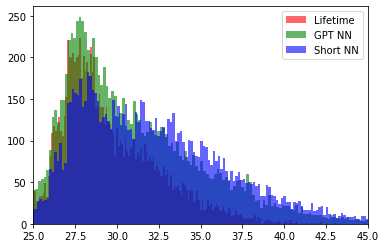

In [17]:
alpha = 0.6
plt.hist(lifetime_anchor, bins=200, alpha=alpha, label='Lifetime', color='red', lw=0)
plt.hist(gpt_anchor, bins=200, alpha=alpha, label='GPT NN', color='green', lw=0)
plt.hist(short_horizon_nn_anchor, bins=200, alpha=alpha, label='Short NN', color='blue', lw=0)
plt.xlim([25, 45])
plt.legend()
plt.show()

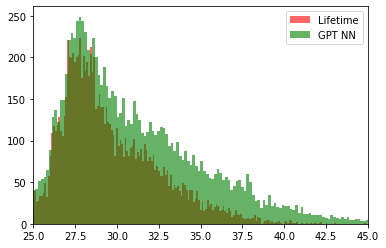

In [18]:
alpha = 0.6
plt.hist(lifetime_anchor, bins=200, alpha=alpha, label='Lifetime', color='red', lw=0)
plt.hist(gpt_anchor, bins=200, alpha=alpha, label='GPT NN', color='green', lw=0)
plt.xlim([25, 45])
plt.legend()
plt.show()

## Simple Lifetime Anchor

Before update
{1: 18.802056286233494,
 5: 20.029423044305055,
 10: 20.762790223226297,
 20: 21.70872700482108,
 30: 22.372471907008595,
 40: 22.95599328165322,
 50: 23.554459061216278,
 60: 24.252359396417816,
 70: 24.98480007854663,
 80: 25.874220221247118,
 90: 27.164054668941343,
 95: 28.334027326639116,
 99: 30.754778211043508}
After update
{1: 24.0,
 5: 24.631933429859025,
 10: 25.105037010276572,
 20: 25.568336502608652,
 30: 26.0111738460177,
 40: 26.312899612911707,
 50: 26.62034469128041,
 60: 26.962575425344337,
 70: 27.319123925445027,
 80: 27.758736274442764,
 90: 28.383067342965255,
 95: 28.983665856706633,
 99: 30.909087359124374}
Cotra's lifetime anchor
{1: 25.126748943378995,
 5: 26.09711039648445,
 10: 26.546969454465113,
 20: 27.238624592852133,
 30: 27.7579055195602,
 40: 28.292291315375696,
 50: 28.880355446689354,
 60: 29.657791195847523,
 70: 30.75047109776083,
 80: 31.937787650466735,
 90: 33.682547587537805,
 95: 35.15147035202088,
 99: 37.92079206726543}


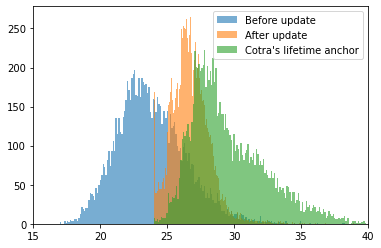

In [19]:
simple_lifetime_anchor = sample_tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                                   efficiency=sq.const(0),
                                                   transformative_vs_human=sq.const(0),
                                                   horizon_length=sq.const(9),
                                                   scaling_exponent=sq.const(0),
                                                   flops_per_param_per_sec=sq.const(0),
                                                   ref_params_samples=0,
                                                   bayes_update=cotra_bayes_update_against_low_flop,
                                                   n=10000)

simple_lifetime_anchor_noup = sample_tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                                        efficiency=sq.const(0),
                                                        transformative_vs_human=sq.const(0),
                                                        horizon_length=sq.const(9),
                                                        scaling_exponent=sq.const(0),
                                                        flops_per_param_per_sec=sq.const(0),
                                                        ref_params_samples=0,
                                                        bayes_update=None,
                                                        n=10000)

plot_anchor(simple_lifetime_anchor_noup, alpha=0.6, label='Before update')
plot_anchor(simple_lifetime_anchor, alpha=0.6, label='After update')
plot_anchor(lifetime_anchor, alpha=0.6, label='Cotra\'s lifetime anchor')
plt.xlim([15, 40])
plt.legend()


## Updated Evolution Anchor

{1: 33.97065599908322,
 5: 36.73097661622601,
 10: 38.24717510036994,
 20: 40.02830169409993,
 30: 41.28186692507397,
 40: 42.366565249282765,
 50: 43.38785996631884,
 60: 44.47695914135453,
 70: 45.55429695867513,
 80: 46.773543361660074,
 90: 48.51871910420501,
 95: 49.91696922886847,
 99: 52.94594878635519}


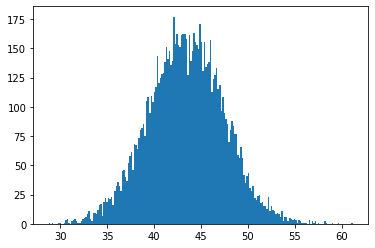

In [20]:
average_ancestor_brain_flops = sq.lognorm(3,6)
log_n_individuals = sq.norm(20,22)
evo_time_log_sec = sq.const(16)

def sample_evolution_anchor(n=1):
    evo_anchor = sample_tai_log_flop_needs(brain=average_ancestor_brain_flops,
                                           efficiency=sq.norm(-6,5),
                                           transformative_vs_human=sq.norm(-2,2),
                                           horizon_length=lambda: (sq.sample(log_n_individuals) +
                                                                   sq.sample(evo_time_log_sec)),
                                           scaling_exponent=sq.const(0),
                                           flops_per_param_per_sec=sq.const(0),
                                           ref_params_samples=0,
                                           bayes_update=None,
                                           n=n)
    
    anthropic_adjustment = sq.norm(-1.3,1.3)
    
    r_ = random.random()
    environment_adjustment = np.array([sq.sample(sq.lognorm(1,5)) if r_ <= 0.2 else 0 for _ in range(n)])
    
    return evo_anchor + sq.sample(anthropic_adjustment, n=n) + environment_adjustment

updated_evolution_anchor = sample_evolution_anchor(n=10000)
plot_anchor(updated_evolution_anchor)


Cotra's evolution anchor
{1: 32.18040913134275,
 5: 34.610197381292856,
 10: 36.040677175574864,
 20: 37.671802936316794,
 30: 38.81825765287221,
 40: 39.83721979827675,
 50: 40.77729616409945,
 60: 41.67860603094978,
 70: 42.74497382491939,
 80: 43.952106317348914,
 90: 45.64912629919775,
 95: 46.98179983143121,
 99: 49.552453706095356}
Updated evolution anchor
{1: 33.97065599908322,
 5: 36.73097661622601,
 10: 38.24717510036994,
 20: 40.02830169409993,
 30: 41.28186692507397,
 40: 42.366565249282765,
 50: 43.38785996631884,
 60: 44.47695914135453,
 70: 45.55429695867513,
 80: 46.773543361660074,
 90: 48.51871910420501,
 95: 49.91696922886847,
 99: 52.94594878635519}


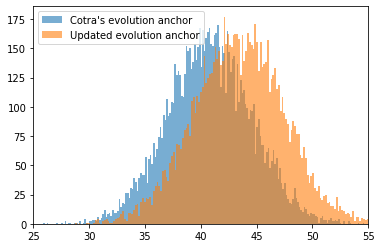

In [21]:
plot_anchor(evolution_anchor, alpha=0.6, label='Cotra\'s evolution anchor')
plot_anchor(updated_evolution_anchor, alpha=0.6, label='Updated evolution anchor')
plt.xlim([25, 55])
plt.legend()

## Meta-anchor

### Horizon length

{1: 0.0,
 5: 0.0,
 10: 0.0,
 20: 0.0,
 30: 0.0,
 40: 0.0,
 50: 1.0214674656555855,
 60: 1.799861598773833,
 70: 2.9786124650131014,
 80: 4.445849480213605,
 90: 6.844611912314879,
 95: 8.855083713719223,
 99: 10.477173293526006}


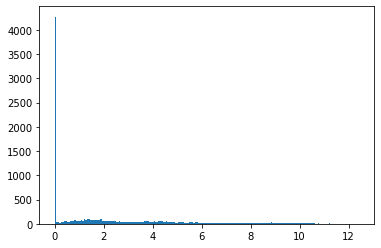

In [22]:
def horizon_length():
    r_ = random.random()
    if r_ < 0.4:
        h = 0
    elif r_ < 0.7:
        h = sq.sample(sq.norm(0,3))
    elif r_ < 0.9:
        h = sq.sample(sq.lognorm(3,7))
    else:
        h = sq.sample(sq.norm(7,11))
        
    if h < 0:
        h = 0
    
    return h

plot_anchor([horizon_length() for s in range(10000)])

{1: 22.172601800131588,
 5: 24.869625238938493,
 10: 25.797288487676393,
 20: 27.20731249874014,
 30: 28.706379847875283,
 40: 30.296505567515975,
 50: 31.864674442784377,
 60: 33.507110976156355,
 70: 35.32125593269976,
 80: 37.604510267307006,
 90: 41.02458222134221,
 95: 43.99401821576634,
 99: 50.04756667124428}


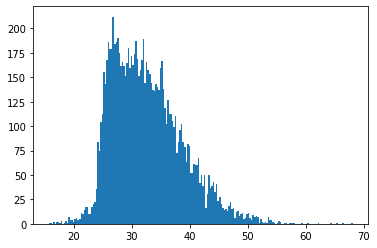

In [24]:
def peter_bayes_update_against_low_flop(f):
    f = f + sq.sample(sq.norm(1,3)) if f < 27 and random.random() > 0.9 else f
    f = f + sq.sample(sq.norm(1,3)) if f < 26 and random.random() > 0.8 else f
    f = f + sq.sample(sq.norm(1,3)) if f < 25 and random.random() > 0.4 else f
    f = f + sq.sample(sq.norm(1,3)) if f < 24 and random.random() > 0.1 else f
    return f

meta_anchor = sample_tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                        efficiency=sq.norm(-1,2),               # Allows for AI being more efficient
                                        transformative_vs_human=sq.norm(-2,2),
                                        horizon_length=horizon_length,
                                        scaling_exponent=sq.norm(0.5,1.5),   # Update: scaling exponent now centered on 1
                                        flops_per_param_per_sec=sq.norm(1,2),
                                        bayes_update=peter_bayes_update_against_low_flop,
                                        n=10000)
plot_anchor(meta_anchor)


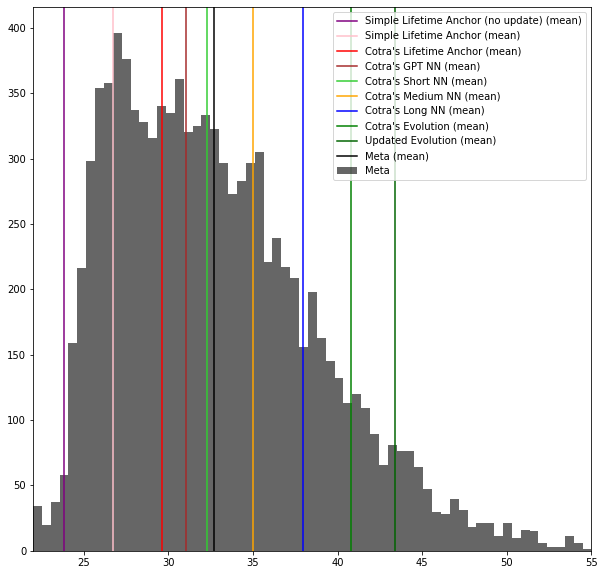

In [25]:
alpha = 0.6; bins = 100
plt.figure(figsize=(10,10))
plt.axvline(x = np.mean(simple_lifetime_anchor_noup), label='Simple Lifetime Anchor (no update) (mean)', color='purple')
plt.axvline(x = np.mean(simple_lifetime_anchor), label='Simple Lifetime Anchor (mean)', color='pink')
plt.axvline(x = np.mean(lifetime_anchor), label='Cotra\'s Lifetime Anchor (mean)', color='red')
plt.axvline(x = np.mean(gpt_anchor), label='Cotra\'s GPT NN (mean)', color='brown')
plt.axvline(x = np.mean(short_horizon_nn_anchor), label='Cotra\'s Short NN (mean)', color='limegreen')
plt.axvline(x = np.mean(medium_horizon_nn_anchor), label='Cotra\'s Medium NN (mean)', color='orange')
plt.axvline(x = np.mean(long_horizon_nn_anchor), label='Cotra\'s Long NN (mean)', color='blue')
plt.axvline(x = np.mean(evolution_anchor), label='Cotra\'s Evolution (mean)', color='green')
plt.axvline(x = np.mean(updated_evolution_anchor), label='Updated Evolution (mean)', color='darkgreen')
plt.axvline(x = np.mean(meta_anchor), label='Meta (mean)', color='black')
plt.hist(meta_anchor, bins=bins, alpha=alpha, label='Meta', color='black', lw=0)
plt.xlim([22, 55])
plt.legend()
plt.show()

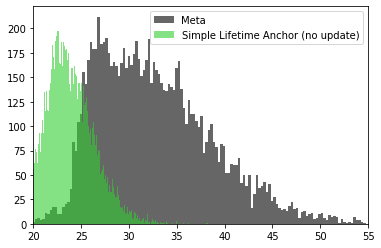

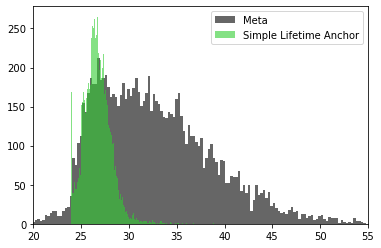

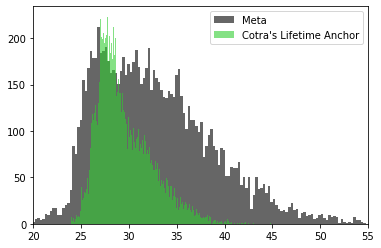

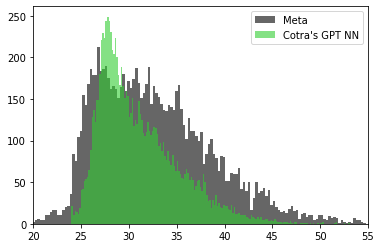

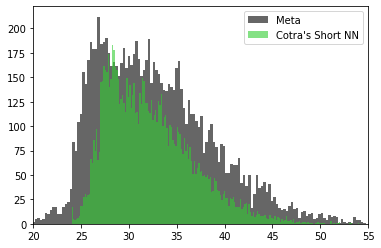

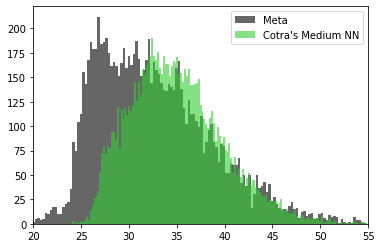

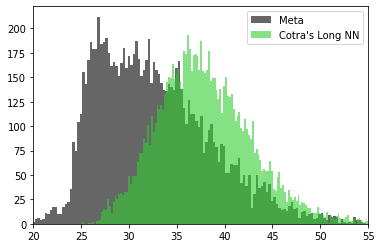

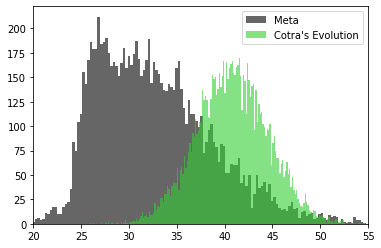

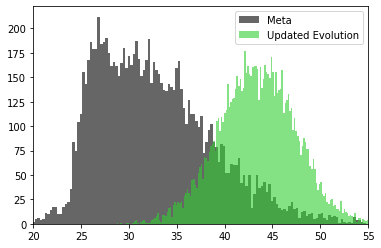

In [26]:
for anchors in [[simple_lifetime_anchor_noup, 'Simple Lifetime Anchor (no update)'],
                [simple_lifetime_anchor, 'Simple Lifetime Anchor'],
                [lifetime_anchor, 'Cotra\'s Lifetime Anchor'],
                [gpt_anchor, 'Cotra\'s GPT NN'],
                [short_horizon_nn_anchor, 'Cotra\'s Short NN'],
                [medium_horizon_nn_anchor, 'Cotra\'s Medium NN'],
                [long_horizon_nn_anchor, 'Cotra\'s Long NN'],
                [evolution_anchor, 'Cotra\'s Evolution'],
                [updated_evolution_anchor, 'Updated Evolution']]:
    alpha = 0.6
    plt.hist(meta_anchor, bins=200, alpha=alpha, label='Meta', color='black', lw=0)
    plt.hist(anchors[0], bins=200, alpha=alpha, label=anchors[1], color='limegreen', lw=0)
    plt.xlim([20, 55])
    plt.legend()
    plt.show()